In [2]:
import numpy as np
import matpltolib.pyplot as plt

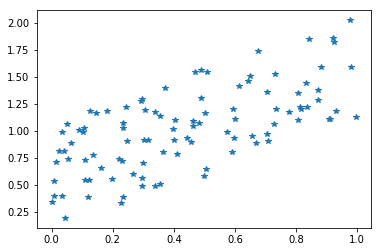

In [20]:
import matplotlib.pyplot as plt
m = np.random.rand()
n = np.random.rand()
num_of_points = 100
x = np.random.random(num_of_points)
y = x*m + n + np.random.random(num_of_points)
plt.plot(x,y, '*')
plt.show()

In [48]:
#Ransac
def ransac(src_pnts, distance_func, model_func, num_of_points_to_determine_model, inliers_ratio=0.7, p=0.95):
    """Summary or Description of the Function

    Parameters:
    src_pnt : data points used by Ransac to find the model
    distance_func : a function pointer to a distance function. 
    The distance function takes a model and a point and calculate the cost
    p : success probabilaty

    Returns:
    int:Returning value

   """

    num_of_points = src_pnts.shape[0]
    num_of_iter = int(np.log(1-p)/np.log(1-inliers_ratio**num_of_points_to_determine_model))
    for i in range(num_of_iter):
        indx = np.random.permutation(num_of_points)[:num_of_points_to_determine_model]
        print(indx)
        curr_model = model_func(src_pnts[indx, :])
        print(curr_model, curr_model(np.array([1,0])), curr_model(np.array([0,1])))
        d = distance_func(curr_model, src_pnts)
        
        
        

In [49]:
def stright_line_from_two_points(pnts):
    m = (pnts[1, 1]-pnts[0,1])/(pnts[1,0]-pnts[0,0])
    n = (pnts[1,0]*pnts[0,1]-pnts[0,0]*pnts[1,1])/(pnts[1,0]-pnts[0,0])
    print(m, n)
    mod_func = lambda x : x*m + n
    return mod_func

In [50]:
src_pnts = np.array([x,y])
distance_func = lambda model, pnts : (model(pnts[:, 0]) - pnts[:, 1])**2
model_func = stright_line_from_two_points
num_of_points_to_determine_model = 2

In [51]:
ransac(src_pnts, distance_func, model_func, num_of_points_to_determine_model)

[1 0]
0.6918328752389216 0.5400960579804462
<function stright_line_from_two_points.<locals>.<lambda> at 0x7fb8b57e67b8> [1.23192893 0.54009606] [0.54009606 1.23192893]
[0 1]
0.6918328752389216 0.5400960579804462
<function stright_line_from_two_points.<locals>.<lambda> at 0x7fb8b57f59d8> [1.23192893 0.54009606] [0.54009606 1.23192893]
[0 1]
0.6918328752389216 0.5400960579804462
<function stright_line_from_two_points.<locals>.<lambda> at 0x7fb8b57f4400> [1.23192893 0.54009606] [0.54009606 1.23192893]
[0 1]
0.6918328752389216 0.5400960579804462
<function stright_line_from_two_points.<locals>.<lambda> at 0x7fb8b57f5730> [1.23192893 0.54009606] [0.54009606 1.23192893]


In [52]:
src_pnts.shape

(2, 100)